***Using Multiclass Classification to classify a flower one of these categories
   1.setosa
   2.versicolor
   3.virginica
   using these four features
   🔵sepal width
   ⚪sepal length
   🟡petal width
   ⚪petal length***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris


In [ ]:
iris=load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
x=iris.data
y=iris.target
feature_names=iris.feature_names
target_names=iris.target_names
data=pd.DataFrame(data=x,columns=feature_names)
data['species']=y
data['species_names']=data['species'].apply(lambda i:target_names[i])
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


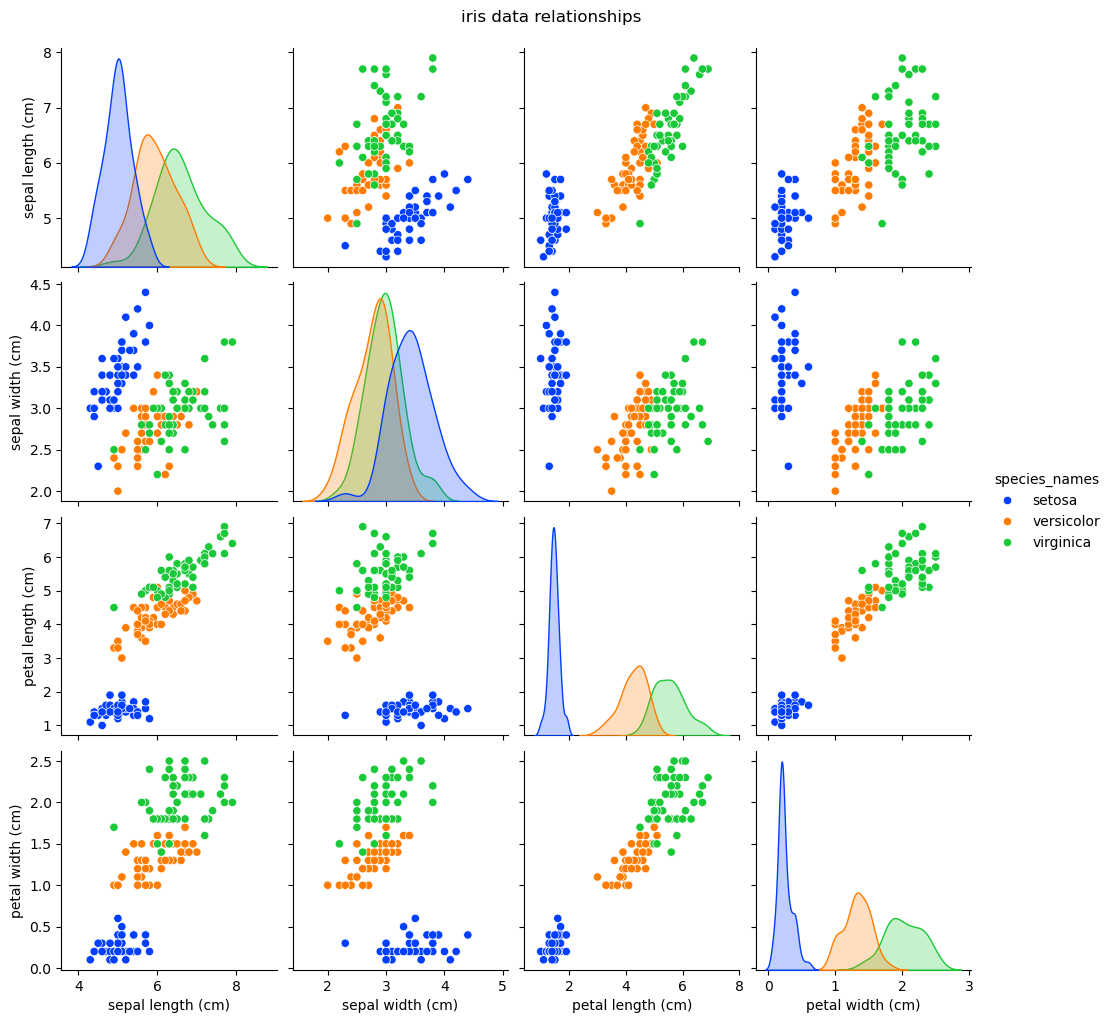

In [34]:
import seaborn as sns
sns.pairplot(data.drop('species',axis=1),hue='species_names',diag_kind='kde',palette='bright')
plt.suptitle('iris data relationships',y=1.02)
plt.show()

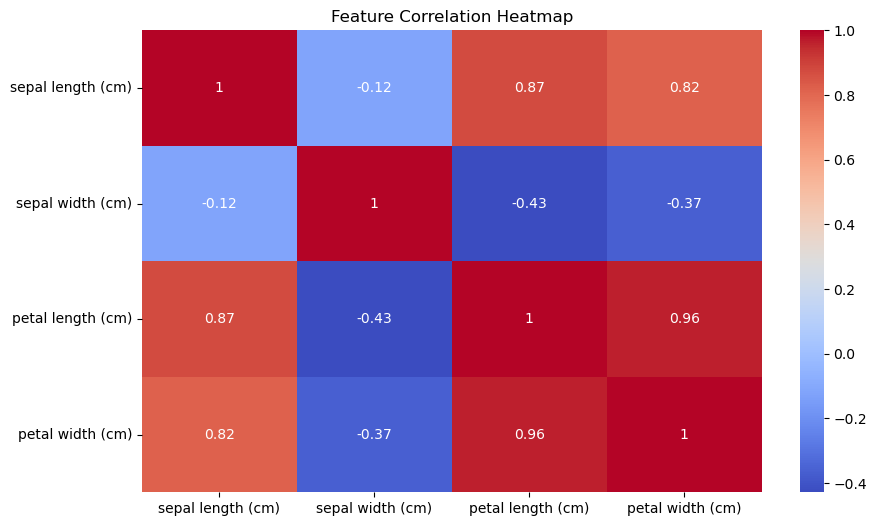

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(['species_names','species'],axis=1).corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [40]:
model.predict([[4.8,3.1,1.6,0.2]])

array([0])

In [41]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [42]:
iris.target_names[model.predict([[4.8,3.1,1.6,0.2]])[0]]

'setosa'

***Confusion matrix means to find the how well model performs. it compare actual target values with those compared by the model and it helps to indentify the errors in the classification***

In [43]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

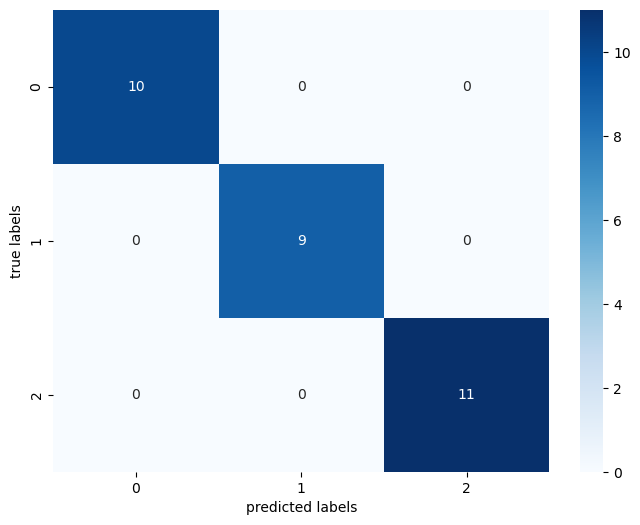

In [45]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

In [27]:
model.score(X_test,y_test)

1.0

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0